# Play with piecewise registration
import stuff

In [1]:
import sys
sys.path.insert(0, '..')
import pwreg
import torch
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

## Load some data

In [2]:
X = pwreg.Dataset('../data/nissl.nii.gz', '../data/tau.nii.gz', '../data/nissl_chunk_mask.nii.gz', torch.float)

In [3]:
I_fix, I_mov, I_fmsk = X.I_fix.downsample(0.17), X.I_mov.downsample(0.17), X.M_fix.downsample(0.17)

In [4]:
I_fix.ras

array([[-0.23600465,  0.        , -0.09800587],
       [ 0.        , -0.23568601, -0.0978441 ],
       [ 0.        ,  0.        ,  1.        ]])

## Create a rigid registration problem

In [5]:
R=pwreg.RigidProblem(I_fix, I_mov, I_fmsk)

Check that the RAS mapping is correct - should line up with `c2d data/nissl.nii.gz -info -resample 172x186 -info-full -probe 60x80vox`

In [6]:
test = torch.nn.functional.affine_grid(torch.Tensor([[1.,0.,0.],[0.,1.,0.]]).unsqueeze(0),
                                       I_fix.T.shape, align_corners=False)

In [7]:
q2 = torch.nn.functional.grid_sample(I_fix.T, test, mode='bilinear', padding_mode='zeros', align_corners=False)

In [8]:
q2[:,:,80,60]

tensor([[0.1176]])

In [9]:
R.R_fix @ np.array([test[:,80,60,1].item(), test[:,80,60,0].item(), 1])

tensor([-14.2583, -18.9527,   1.0000], dtype=torch.float64)

## Play

In [28]:
theta, dx, dy = torch.zeros(8).type(torch.float), torch.zeros(8).type(torch.float)+0.1, torch.zeros(8).type(torch.float)-0.2

In [29]:
q,M,A,grid = R.forward(theta, dx, dy)

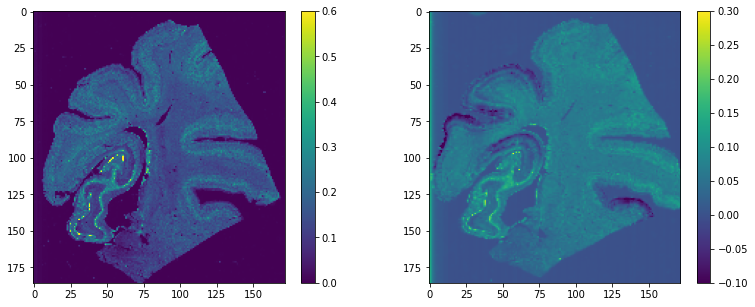

In [30]:
fig, (ax1, ax2) = plt.subplots(figsize=(13, 5), ncols=2)
fig.colorbar(ax1.imshow(R.I_fix.T.squeeze(), vmin=0.0, vmax=0.6), ax=ax1)
fig.colorbar(ax2.imshow(q[0,0,:,:], vmin=-0.1, vmax=0.3), ax=ax2)

In [27]:

M

tensor([[[ 0.9211, -0.3894,  0.1000],
         [ 0.3894,  0.9211, -0.2000],
         [ 0.0000,  0.0000,  1.0000]],

        [[ 0.9211, -0.3894,  0.1000],
         [ 0.3894,  0.9211, -0.2000],
         [ 0.0000,  0.0000,  1.0000]],

        [[ 0.9211, -0.3894,  0.1000],
         [ 0.3894,  0.9211, -0.2000],
         [ 0.0000,  0.0000,  1.0000]],

        [[ 0.9211, -0.3894,  0.1000],
         [ 0.3894,  0.9211, -0.2000],
         [ 0.0000,  0.0000,  1.0000]],

        [[ 0.9211, -0.3894,  0.1000],
         [ 0.3894,  0.9211, -0.2000],
         [ 0.0000,  0.0000,  1.0000]],

        [[ 0.9211, -0.3894,  0.1000],
         [ 0.3894,  0.9211, -0.2000],
         [ 0.0000,  0.0000,  1.0000]],

        [[ 0.9211, -0.3894,  0.1000],
         [ 0.3894,  0.9211, -0.2000],
         [ 0.0000,  0.0000,  1.0000]],

        [[ 0.9211, -0.3894,  0.1000],
         [ 0.3894,  0.9211, -0.2000],
         [ 0.0000,  0.0000,  1.0000]]])

IndexError: too many indices for tensor of dimension 3

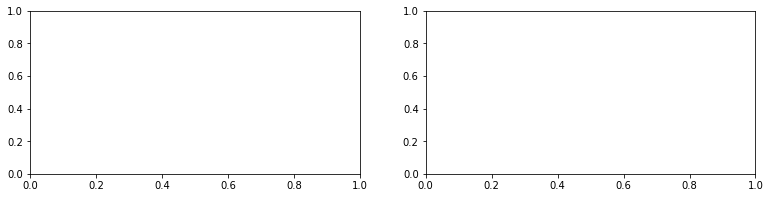

In [14]:
fig, (ax1, ax2) = plt.subplots(figsize=(13, 3), ncols=2)
fig.colorbar(ax1.imshow(A[0,:,:,0]), ax=ax1)
fig.colorbar(ax2.imshow(A[0,:,:,1]), ax=ax2)

In [ ]:
R.Q_mov @ R.R_fix